ValueError: shape mismatch: objects cannot be broadcast to a single shape

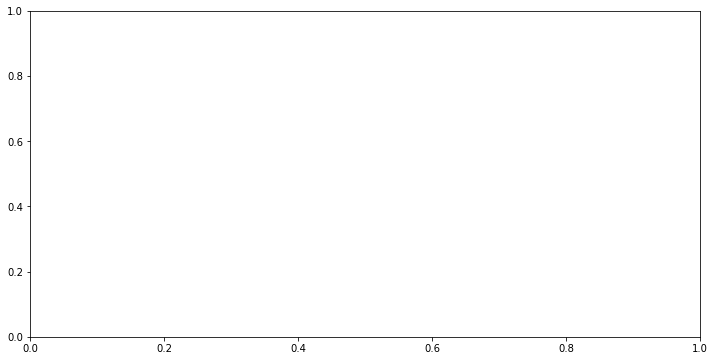

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import pandas as pd

# bar ands lines are models
# y axis = infomration gain
# x axis = bar chart probes
# scatter = performance of glue task (y = axis glue acc, x axis = glue tasks)
#distilbert-base-uncased","MiniLMv2-L6-H768-distilled-from-BERT-Base and bert768

glue_tasks = ["qnli","mrpc","rte","cola","mnli","qqp","stsb","sst2"]
probe_tasks=["dep_rel","named_entities","ptb_pos","upos","word_sense","sst2"]
models = ["distilbert-base-uncased","MiniLMv2-L6-H768-distilled-from-BERT-Base","bert768"]
layer_numbers=[6,6,12]


def get_total_probe_v(task,model_name,layer_number):
    file_paths = ['reports/{}-{}-layer{}.yaml.results/dev.v_entropy'.format(probe_task,model,i) for i in range(0,layer_number)]
    total_acc = []
    for file_path in file_paths: 
        if os.path.isfile(file_path):
            with open(file_path, "r") as f:
                total_acc.append(float(f.read().strip()))
        else:
            print("Path Invalid" + file_path)
    return sum(total_acc)

def get_glue_acc(glue_task,model_name,glue_data):
    model_condtion = glue_data["Model"] == model_name
    task_condtion = glue_data["Task"] == glue_task
    return glue_data.loc[(model_condtion & task_condtion)]["Training Results"].iat[0]


# glue_data = pd.read_excel("grouped_data.xlsx")


results = np.empty((0,len(probe_tasks)))
for count, model in enumerate(models):
    row = []
    for probe_task in probe_tasks:
        r = get_total_probe_v(probe_task, model,layer_numbers[count])
        row.append(r)
    results = np.append(results, [row], axis=0)


df = pd.DataFrame(results, columns = ['Probe Task','Model','Total V Entropy'])
plt.figure(figsize=(12,6))
X_axis = np.arange(len(models))

plt.bar(X_axis - 0.2, results[0,:], 0.4, label = 'Girls')
plt.bar(X_axis + 0.2, results[1,:], 0.4, label = 'Boys')
  
plt.xticks(X_axis, models)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

        # plt.title("GLUE: "+glue_task+ " Probse: "+probe_task)
        # plt.xlabel("Probe Accuracy")
        # plt.ylabel("Glue Accuracy")
        # sns.scatterplot(x=x_results, y=y_results, hue=models)
        # plt.show()
